Memory tilings (less mathemical version)

Playing with my son memory, I noted, that there is usually somewhere a directly neighboring pair in the tiling. (Directly neighboring is defined as neighboring on a edge, not just over a corner. )

Why are there those pair? Is it just because of not perfect mixing? Or is it normal? As a scientist I know that no repetition is often unlikely and that small patterns can appear by chance. In contrast, my wife thought that there should be usually no neighbors. 

To solve that I use now python for calclulations, first I import the libraries. 

In [2]:
#importing the necessary libraries
import numpy as np
import time
import math
from functions_memory1 import *
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm
%matplotlib inline

The needed functions are created in function_memory1.The number of pairs in the memory game of my son is 12. I now apply the created functions to create a random memory tiling which is then shown below. 

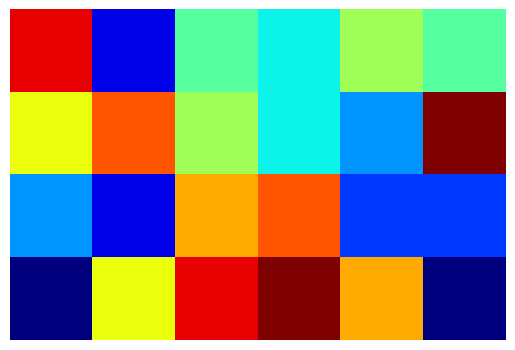

In [3]:
n_pair=12
xar=fac(n_pair)
shuf=random_1d(n_pair)
reord=shuf.reshape(xar[0], xar[1])
plt.axis('off')
plt.imshow(reord,cmap=cm.jet, interpolation='nearest')
#add pictures of real memory at some point

Since some neighbors have the same colors, there are neighbors as in many random draws but not in all.

The most straight forward way to determine whether there is typical no random pair is to just count how there is neighboring pair. That I do below for the smallest possible memory of two pairs. 

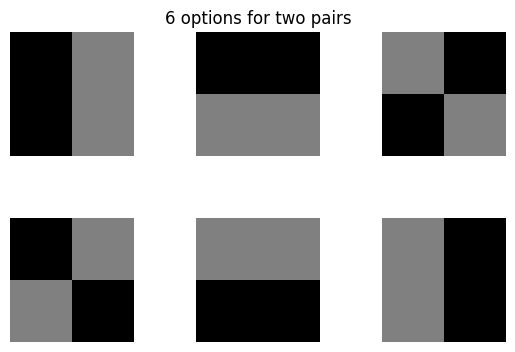

In [3]:
#likely make that also to a function to hide most
mem2a=[[2,2],[1,1]]
mem2b=[[2,1],[2,1]]
mem2c=[[1,2],[2,1]]
mem2d=[[2,1],[1,2]]
mem2e=[[1,2],[1,2]]
mem2f=[[1,1],[2,2]]
com=np.zeros((8,5))
com[0:2,0:2]=mem2a
com[3:5,0:2]=mem2b
com[6:8,0:2]=mem2c
com[0:2,3:5]=mem2d
com[3:5,3:5]=mem2e
com[6:8,3:5]=mem2f
plt.axis('off')
plt.title("6 options for two pairs")
plt.imshow(1-com.T,cmap=cm.gray, interpolation='nearest')

There are six possibilities. 4 of 6 have neighboring pairs, only 2 of 6, a third has not. 

The number of total options follows from the following consideration:
4 options can be drawn for the first location. Multiplied on that are then three options for the second location and then two for the third while only one option remains for the last location. (This operation of multiplying a number by all number equal or smaller than itself is the factorial of a number.) That results into 24 options which is true for 4 different options. However, because in this case we have two identical pairs, they are equivalent and thus the result is divided twice by 2. (Mathematical that is 2 to to the power of 2.)

As equation it is: N!/(2)^(N/2) for draw options, which for a number of pairs is:  (2*P)!/2^P

For two pairs it is: (4 *3 *2)/2^2=24/4=6

That means already for 3 pairs, it are much more: 6 *5 *4 *3 *2/2^3=90 possibilities.

Thus  already for three pairs there are a lot of possibilities. While that still can be counted by a man, it is proon to errors
and thus I construct function for this purpose. 

I now run the program to get the permutations of 3 pairs and siaplay then the options. 

all permutations are 720
unique permutations are 90
run time is 0.011766672134399414 s


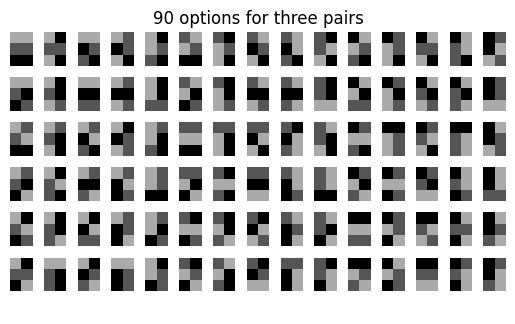

In [4]:
n_pair=3
res=uniqper(n_pair)
xar=fac(n_pair)
mem=np.zeros((44,25))
for i in range(15):
    for j in range(6):
        res2=res[j+i*6]
        reord=res2.reshape(xar[0], xar[1])+1
        mem[i*3:2+3*i,4*j:3+4*j]=reord
plt.axis('off')
plt.title("90 options for three pairs")
plt.imshow(1-mem.T,cmap=cm.gray, interpolation='nearest')

As visible the number of permutations is too large that humans can reliable count the optiom. 

Therefore I construct another function which determines whether a tile was neighboring pair. It is run for few pairs.

In [7]:
all_perm_prob=np.zeros((2,4))
for i in range(all_perm_prob.shape[1]):
    npair=2+i
    all_perm_prob[0,i]=npair
    all_perm_prob[1,i]=prob_all_perm(npair)
np.savetxt("probabilities_all_permutations.txt", all_perm_prob) 

2 pairs
number of permutations 24
run time is 0.0002 sec
no neighbor in tile to 33.33 % 
3 pairs
number of permutations 720
run time is 0.0125 sec
no neighbor in tile to 13.33 % 
4 pairs
number of permutations 40320
run time is 0.5313 sec
no neighbor in tile to 20.0 % 
5 pairs
number of permutations 3628800
run time is 46.8512 sec
no neighbor in tile to 19.68 % 


It is visible in the printed numbers that clearly less 50% have no pairs in a tiling. While there is a lot variation between 2 and 4 pairs, the fraction is then more stable, but a trend from two numbers is not certain. 

Already 5 pairs takes long to run on a laptop and 6 does not work. 

Thus 12 pairs are far from possible. Thereforw, I use in the following two approximations to get probabilities. 

Firstly here, here I calculate it from the number of pairs and how the are tiled. I assume that each pairs is independent of each other. Then the function determines the number of corner, edge and inner tile because the number of neighbors depends on that. The number of neighbors pairs following from that needs to be divided by two since otherwise each neighbor pair is counted twice.  
By this number is then the probability taken to the power.
The probablity is how likely it is that two neighbors are not a pair. Just one of the 2*pairs options is a problem, given that one of the N is already excluded, since it is the tile considered, the probability is (2 * N-2)/(2*N-1) 

I calculate that for up to 12 pairs. 

In [5]:
nn=int(12)-1
res_ana=np.zeros((4,nn))
for i in range(nn):
    res_ana[0,i]=i+2
    a,b,c=ana_prob(i+2)
    res_ana[1,i]=a
    res_ana[2,i]=b
    res_ana[3,i]=c        

I compare the this way obtained answer with the probabilities obtained when checking all permutations in the plot below. 

Text(0, 0.5, '% of having no neighboring pair')

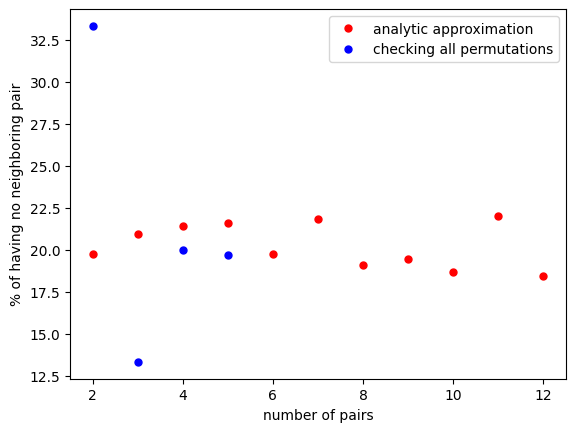

In [8]:
plt.plot(res_ana[0],res_ana[3]*100,'o',ms=5,color='red', label='analytic approximation')  
plt.plot(all_perm_prob[0],all_perm_prob[1]*100,'o',ms=5,color='blue', label='checking all permutations')  
plt.legend(loc="best")
plt.xlabel("number of pairs")
plt.ylabel("% of having no neighboring pair")

For 2 and 3 the results obtained with the two methods are rather different, then they get more similar. The high probability for 2 pairs is because for thios tiling there is a second neighbor in pair when there is a firsty neighboring one. That violate one of the main assumption of the calculation.

While its is expected that this problem is smaller for a larger number of pairs, I now use another way for getting a probability, randomly drawing numbers. 

We run that for up two 12 pairs. 

In [10]:
time_start = time.time()
nn=11
res3=np.zeros((2,nn))
for i in range(nn):
    print(f"running for {i+2} pairs")
    res3[0,i]=i+2
    res3[1,i]=count_rand_pairb(res3[0,i],1000000)
time_stop = time.time()    
print(f"number of second needed to run is {time_stop-time_start}")
np.savetxt('random_2_to12_its1000000.txt',res3)

running for 2 pairs
running for 3 pairs
running for 4 pairs
running for 5 pairs
running for 6 pairs
running for 7 pairs
running for 8 pairs
running for 9 pairs
running for 10 pairs
running for 11 pairs
running for 12 pairs
number of second needed to run is 802.0116450786591


By comparison with doing all permulation it is possible to see how many draws are needed that random effects are small. In the plot below it is visible that for 100000 drawn the difference is barely visible, and thus that enough are needed.
Below I plot the results for the different varianst of calculations. 

Text(0, 0.5, '% of having no neighboring pair')

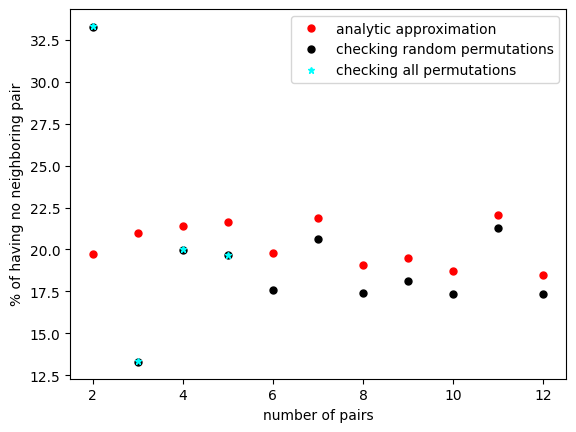

In [11]:
res3=np.loadtxt('random_2_to12_its1000000.txt')
plt.plot(res_ana[0],res_ana[3]*100,'o',ms=5,color='red', label='analytic approximation')   
plt.plot(res3[0],res3[1]*100,'o',ms=5,color='black', label='checking random permutations')
plt.plot(all_perm_prob[0],all_perm_prob[1]*100,'*',ms=5,color='cyan', label='checking all permutations') 
plt.legend(loc="best")
plt.xlabel("number of pairs")
plt.ylabel("% of having no neighboring pair")

Overall it is visible that the anlytic approximation overestimate the number of no pairs slightly, by about 1% between 4 and 12 pairs. Both agree that there is no pair is unlikely for perfect shuffling. For 12 pairs it happens with about 17.4% probability that corresponds to about once in six games.